# Udacity Nano-Degree Data Analyst - Airbus

## Introduction to Data Analysis

### Exploratory Data Analysis - The Movie Database

In this notebook, we are going to explore the dataset related to the Movie Database. The purposes will be to understand its strructure, the correlation between the several variables, and answer some business oriented questions thanks to data analysis (once the dataset will have been cleaned).

Questions we would like to answer :
1. Profit-wise, what are the top and lowest profit earned movies? what's the top 10 most profitable movies?
2. Highest/lowest budgeted movie?
3. Highest/lowest rated movie?
4. Which month of the year sees on average the most releases ? Which one has the highest average revenue?
5. What is th emost popular genre?
6. Most casted actor?
7. Which production companies are the busiest?
8. Which ones made significant earnings with their movies?
9. Most popular directors?
10. If I was to produce a movie next year, with the target of generating the more revenues, what should I do?

Let's get started !

#### Data import & general overview

In [32]:
#library import
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
#Dataset import
filepath = "C:/Users/nz109654/Desktop/Nano-Degree/2-Introduction to Data Analysis/Project/tmdb-movies.csv"
df = pd.read_csv(filepath)

In [34]:
#Overview of the file
df.shape

(10866, 21)

In [35]:
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [36]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [37]:
#Data type summary
dtype_df = df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,6
1,float64,4
2,object,11


What can we see from our first data exploration ?
    - Dataset has 10k+ observations and 21 features
    - Some cleaning will be necessary on several columns (cast/director/date not in the proper format)
    - Popularity seem quite skewed (standard deviation > mean value, values quite spread). We'll plot it later on 
    - Budget and revenues are not tied to a currency. We will assume USD. And we will only take in consideration the adjusted values, to compare things on a similar baseline (the release_year values are spread between 1960 and 2015, and 1USD in 1960 <> 1USD in 2015!)
    - Budget value = 0? Not very usefull information!
    - There seem to be outliers in the runtime feature (min = 0 ? Even a super short movie wouldn't last a couple of seconds)
    - We have half of the dataset that is composed by numbers and half by strings


Before beginning the cleaning process, let's plot two key elements : the correlation map and the assumed reponse variable, popularity. This will help us to have a better understand of the hidden ties between the features, and confirm/infirm our first hypothesis regarding the popularity distribution (as a reminder, we believed it was skewed)

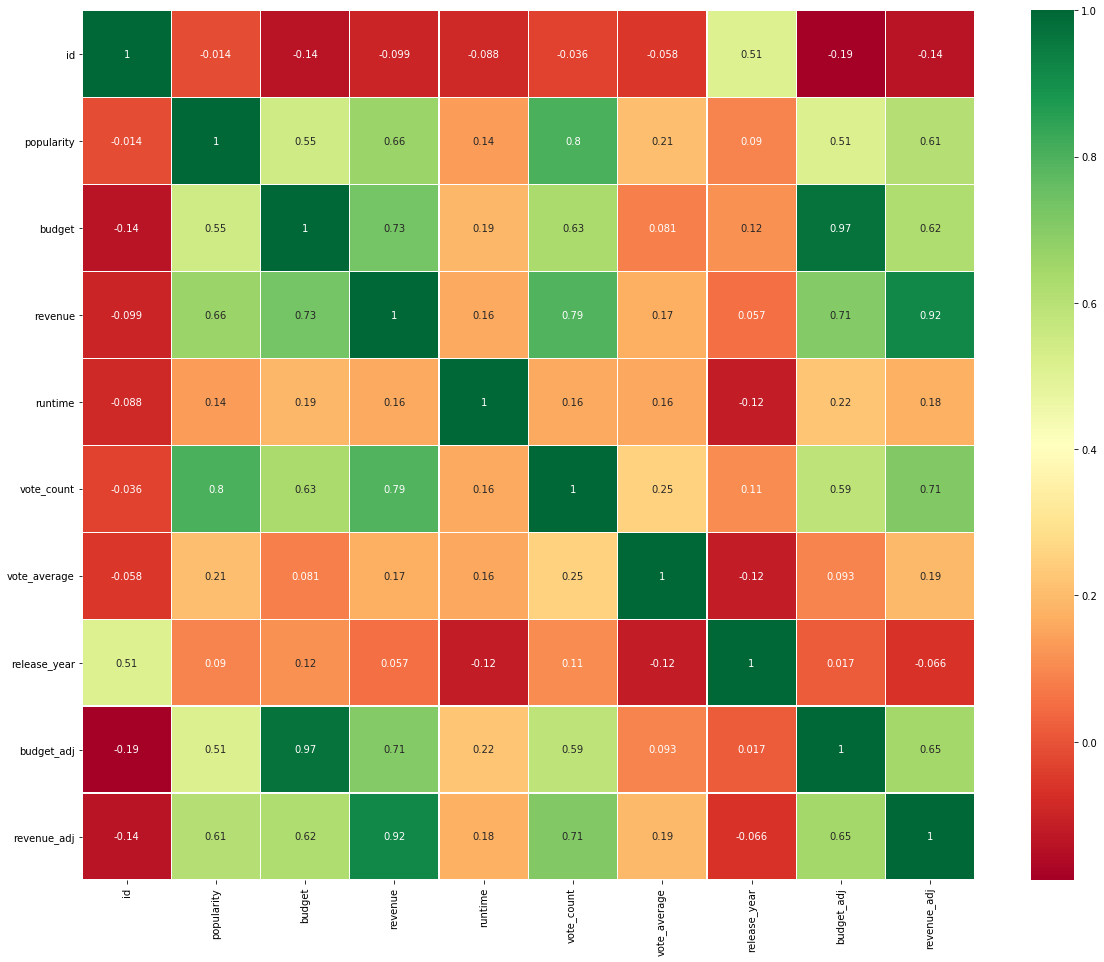

In [38]:
#Correlation map to see how features are correlated
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(20,16)
plt.show()

Several highly correlated (> 0.5) features appear ! 
Popularity is highly correlated with and budget, revenues and vote_count. Highest popularity due to more people voting is somehow logical, revenues in the same fashion (the more popular a movie is/was, the more people went to see it). But interestingly, the budget and popularity are positively correlated, so a first asumption could be that if a lot of budget was put in the movie making, there are higher chances for it to be popular. 

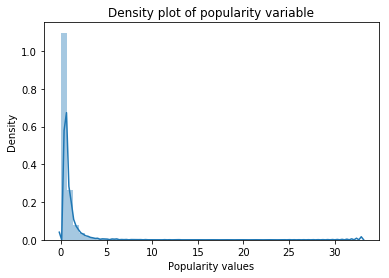

In [39]:
#Response variable distribution
ax = sns.distplot(df['popularity'])
plt.xlabel("Popularity values")
plt.ylabel("Density")
plt.title("Density plot of popularity variable")
plt.show(ax)

As assumed, the distribution is very positively skewed.

#### Data wrangling & cleaning

In [40]:
#Check for duplicates
idsUnique = len(set(df.id))
idsTotal = df.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 1 duplicate IDs for 10866 total entries


In [41]:
df = df.drop_duplicates()

There was 1 duplicated line, which has now been deleted

In [42]:
#Check for missing values
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:21]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data.head(20)

,Missing Ratio
homepage,72.977451
tagline,25.991717
keywords,13.741371
production_companies,9.479982
cast,0.699494
director,0.404970
genres,0.211689
imdb_id,0.092039
overview,0.036815


In a dataset, when more than 30% of the data are missing, we have to consider dropping the feature. In this situation, as the homepage is mainly missing, and this won't help to answer any of the question we previously asked, we can safely get rid of it. Same way of thinking can be applied to tagline and keywords. 
As only very few cast & directors are missing, we can get rid of the observations impacted without alterating to much the dataset. But regarding the production companies, where 10% of the data are missing, we will have to be careful. We'll come back to that.

Change format of release date into Datetime format

In [43]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

Dropping several useless columns

In [44]:
df.drop(["budget", "revenue", "overview", "imdb_id", "homepage", "tagline", "id", "overview"], axis = 1, inplace = True)
print("New dataset dimensions : ", df.shape)

New dataset dimensions :  (10865, 14)


As some lines have missing informations (budget & revenues adjusted = 0), we will take them out during the analysis part

In [45]:
#Creating a Profit column
df["profit"] = df["revenue_adj"] - df["budget_adj"]

#Usefull functions for later use

#Find min and max of a given feature
def minmax(col):
    minindex = df[col].idxmin()
    maxindex = df[col].idxmax()
    mini = pd.DataFrame(df.loc[maxindex, :])
    maxi = pd.DataFrame(df.loc[minindex, :])
    print("Highest "+ col + " : ", df["original_title"][maxindex])
    print("Lowest "+ col + " : ", df["original_title"][minindex])
    return pd.concat([mini, maxi], axis = 1)

#We saw that actors and genres had to be cleaned up due to some | separating the names. 
#We will define a function that wil ldo it, and that we will call when we will have to deal with those columns
def spliter(col):
    x = df[col].str.cat(sep = "|")
    y = pd.Series(x.split("|"))
    #We will directly include in the function the counting of elements, as it will be need later on
    return y.value_counts(ascending = False)

#### Answering questions

1.Profit-wise, what are the top and lowest profit earned movies ? The top 10 most profitable movies ?

In [46]:
#Just call the min max function on the profit column created!
minmax('profit')

Highest profit :  Star Wars
Lowest profit :  The Warrior's Way


,1329,2244
popularity,12.0379,0.25054
original_title,Star Wars,The Warrior's Way
cast,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,George Lucas,Sngmoo Lee
keywords,android|galaxy|hermit|death star|lightsaber,assassin|small town|revenge|deception|super speed
runtime,121,100
genres,Adventure|Action|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Lucasfilm|Twentieth Century Fox Film Corporation,Boram Entertainment Inc.
release_date,1977-03-20 00:00:00,2010-12-02 00:00:00
vote_count,4428,74


Star Wars seems to be the highest profit movie. We use the adjusted profit (based on adjusted revenues and budget), the result might be different if we used the regular columns budget and revenues. The Warrior Way, on the other side, seem to be a massive failure (-413M USD in loss).

In [47]:
info = pd.DataFrame(df["profit"].sort_values(ascending = False))
for i in ['original_title','release_year']:
    info[i] = df[i]
info.head(10)

,profit,original_title,release_year
1329,2.750137e+09,Star Wars,1977
1386,2.586237e+09,Avatar,2009
5231,2.234714e+09,Titanic,1997
10594,2.128036e+09,The Exorcist,1973
9806,1.878643e+09,Jaws,1975
8889,1.767968e+09,E.T. the Extra-Terrestrial,1982
3,1.718723e+09,Star Wars: The Force Awakens,2015
8094,1.551568e+09,The Net,1995
10110,1.545635e+09,One Hundred and One Dalmatians,1961
7309,1.376998e+09,The Empire Strikes Back,1980


2.Highest/lowest budgeted movie?

In [48]:
#Same reasoning as before. After a first run, it appears that the lowest budgeted movie 
#is Sherlock Holmes, with a budget of ... 0 USD. 
#This seems to be an error, so we will have to take the lines with budget = 0 out. We will replace them by NaN
df["budget_adj"] = df["budget_adj"].replace(0, np.NAN)
minmax('budget_adj')

Highest budget_adj :  The Warrior's Way
Lowest budget_adj :  Fear Clinic


,2244,1151
popularity,0.25054,0.177102
original_title,The Warrior's Way,Fear Clinic
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Thomas Dekker|Robert Englund|Cleopatra Coleman...
director,Sngmoo Lee,Robert Hall
keywords,assassin|small town|revenge|deception|super speed,phobia|doctor|fear
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Horror
production_companies,Boram Entertainment Inc.,Dry County Films|Anchor Bay Entertainment|Movi...
release_date,2010-12-02 00:00:00,2014-10-31 00:00:00
vote_count,74,15


3.Highest/lowest rated movie?

In [49]:
#Same thing on vote_average
minmax("vote_average")

Highest vote_average :  The Story of Film: An Odyssey
Lowest vote_average :  Transmorphers


,3894,7772
popularity,0.006925,0.12112
original_title,The Story of Film: An Odyssey,Transmorphers
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Matthew Wolf|Amy Weber|Shaley Scott|Eliza Swen...
director,Mark Cousins,Leigh Scott
keywords,cinema|nouvelle vague|hindi cinema|cinema novo...,futuristic
runtime,900,86
genres,Documentary,Action|Adventure|Science Fiction
production_companies,NaN,"Asylum, The"
release_date,2011-09-03 00:00:00,2007-06-26 00:00:00
vote_count,14,10


Those values are not necessarily very representative as there are only 10 and 14 votes for these movies (star Wars had more than 4400 votes).

4.Which month of the year sees on average the most releases ? Which one has the highest average revenue?

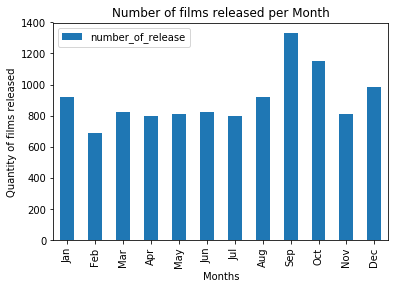

In [50]:
#Thanks to the transformation of the date in the correct format, extracting the month will be easy
month = df["release_date"].dt.month
number = month.value_counts().sort_index()
#We create a standard list of months name
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
#We bundle everything in a Dataframe to plot latter on
number = pd.DataFrame(number)
number['month'] = months
number.rename(columns = {'release_date' : 'number_of_release'}, inplace = True)
#We create a bar plot to show the situation
ax = number.plot(x = 'month', kind = 'bar')
plt.xlabel("Months")
plt.ylabel("Quantity of films released")
plt.title("Number of films released per Month")
plt.show(ax)

Many releases in September/October, just after the summer break. This is followed by the end of the year (December and a bit in January).

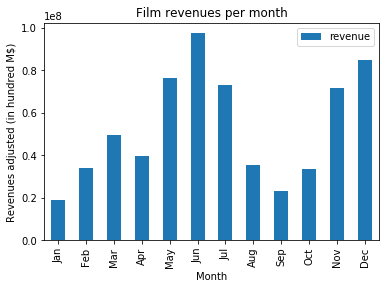

In [51]:
month = pd.DataFrame(month)
month["revenue"] = df["revenue_adj"]
mean = month.groupby("release_date").mean()
mean["month"] = months
ax = mean.plot(x = "month", kind = "bar")
plt.xlabel("Month")
plt.ylabel("Revenues adjusted (in hundred M$)")
plt.title("Film revenues per month")
plt.show(ax)

On average, it seems that the revenues generated in June and December are the highests. 

5.What is the most popular genre?

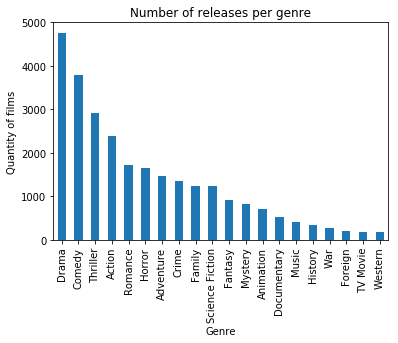

In [52]:
#Let's use the function created earlier
genres = spliter("genres")
ax = genres.plot(kind = "bar")
plt.xlabel("Genre")
plt.ylabel("Quantity of films")
plt.title("Number of releases per genre")
plt.show(ax)

Drama it is! Followed by Comedy, Thriller and Action

6.Most casted actor?

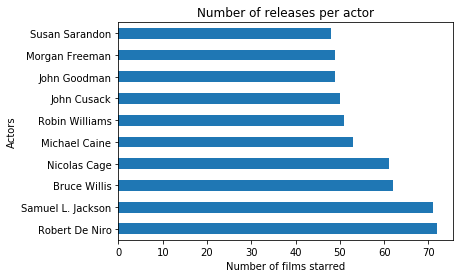

In [53]:
actor = spliter("cast")
ax = actor.iloc[:10].plot(kind = "barh")
plt.xlabel("Number of films starred")
plt.ylabel("Actors")
plt.title("Number of releases per actor")
plt.show(ax)

7.Which production companies are the busiest?

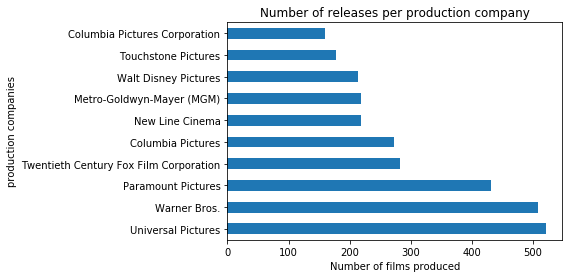

In [54]:
production = spliter("production_companies")
production.iloc[:10].plot(kind = "barh")
plt.xlabel("Number of films produced")
plt.ylabel("production companies")
plt.title("Number of releases per production company")
plt.show(ax)

8.Which one made significant earnings with their movies?

In [55]:
earnings = pd.pivot_table(df,
                          values = "profit",
                          index = "production_companies",
                          aggfunc = np.sum)
earnings.sort_values(by = ["profit"], ascending = False).head(1)

,profit
production_companies,
Paramount Pictures,1.119874e+10


9.Most popular directors?

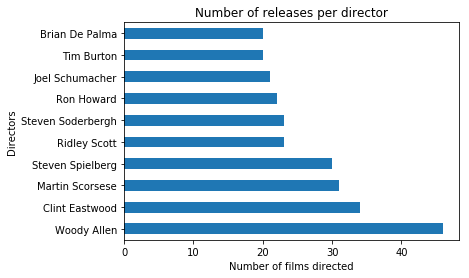

In [56]:
direct = spliter("director")
ax = direct.iloc[:10].plot(kind = "barh")
plt.xlabel("Number of films directed")
plt.ylabel("Directors")
plt.title("Number of releases per director")
plt.show(ax)

10.If I was to produce a movie next year, with the target of generating the highest revenues, what should I do ?

Based on the correlation matrix, and our findings, I should have a movie out in June or December, and quite some budget (correlation > 0.6). 

# Conclusion

What did we observe in this dataset ?
    - Drama is the most popular genre
    - Woody Allen is the director that shooted the most films
    - Paramount, Warner Bros and Universal Pictures have been the companies with the highest amount of releases. Surprisingly MGM isn't that high (I would have expected them to score better)
    - Robert de Niro starred quite a lot of movies, in tight competition with Samuel Lee Jackson. Interesting thing, the top 10 most casted actors shows actors from diverse generations
    - Summer time and winter time movies are the most profitable. Which is somehow logical, given that the audience will have more free time to go see them

Several elements could be further investgated. One that could be very interesting would be to create a model that would forecast the popularity depending on the features explored in this project. And potentially the profit it would generate!

About the dataset :
    - Data needed some cleaning, but were not too messy
    - All the questions we asked ourselves at the beginning could be answered, so for our analysis, the quality and quantity of data was sufficient. We nevertheless had to remove useless features (too many missing variables or inacurate ones)